In [1]:
import numpy as np
import pandas as pd
%matplotlib inline
from matplotlib import pyplot as plt
import seaborn as sns

In [2]:
News = pd.read_csv("fake_or_real_news.csv")

In [3]:
News.head()

,Unnamed: 0,title,text,label
0,8476,You Can Smell Hillary’s Fear,"Daniel Greenfield, a Shillman Journalism Fello...",FAKE
1,10294,Watch The Exact Moment Paul Ryan Committed Pol...,Google Pinterest Digg Linkedin Reddit Stumbleu...,FAKE
2,3608,Kerry to go to Paris in gesture of sympathy,U.S. Secretary of State John F. Kerry said Mon...,REAL
3,10142,Bernie supporters on Twitter erupt in anger ag...,"— Kaydee King (@KaydeeKing) November 9, 2016 T...",FAKE
4,875,The Battle of New York: Why This Primary Matters,It's primary day in New York and front-runners...,REAL


In [4]:
News.shape

(6335, 4)

In [5]:
News.dtypes

Unnamed: 0     int64
title         object
text          object
label         object
dtype: object

**All Columns have correct datatypes.**

# Visualization before Pre Processing :-

**BARPLOT :-**

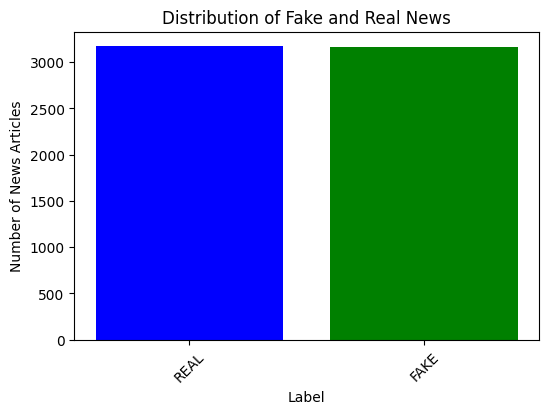

In [6]:
# Count the occurrences of each label
label_counts = News['label'].value_counts()

# Plot the bar plot
plt.figure(figsize=(6, 4))
plt.bar(label_counts.index, label_counts.values, color=['blue', 'green'])
plt.xlabel('Label')
plt.ylabel('Number of News Articles')
plt.title('Distribution of Fake and Real News')
plt.xticks(rotation=45)
plt.show()

**PIE CHART :-**

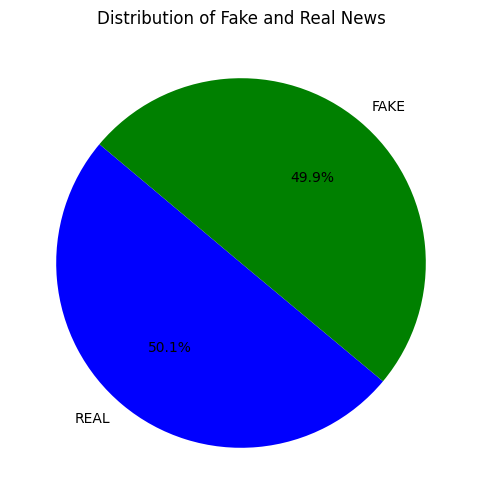

In [7]:
# Count the occurrences of each label
label_counts = News['label'].value_counts()

# Plot the pie chart
plt.figure(figsize=(6, 6))
plt.pie(label_counts, labels=label_counts.index, autopct='%1.1f%%', colors=['blue', 'green'], startangle=140)
plt.title('Distribution of Fake and Real News')
plt.show()

In [8]:
# Count the occurrences of each label
label_counts = News['label'].value_counts()

# Get the total count of fake and real news
total_fake_news = label_counts['FAKE']
total_real_news = label_counts['REAL']

print("Total Fake News:", total_fake_news)
print("Total Real News:", total_real_news)


Total Fake News: 3164
Total Real News: 3171


# Data Cleaning:-

Since, We do not need unnamed column for our Model so we are going to drop it.

In [9]:
# Drop the 'Unnamed: 0' column
News = News.drop(columns=['Unnamed: 0'])

In [10]:
News.head()

,title,text,label
0,You Can Smell Hillary’s Fear,"Daniel Greenfield, a Shillman Journalism Fello...",FAKE
1,Watch The Exact Moment Paul Ryan Committed Pol...,Google Pinterest Digg Linkedin Reddit Stumbleu...,FAKE
2,Kerry to go to Paris in gesture of sympathy,U.S. Secretary of State John F. Kerry said Mon...,REAL
3,Bernie supporters on Twitter erupt in anger ag...,"— Kaydee King (@KaydeeKing) November 9, 2016 T...",FAKE
4,The Battle of New York: Why This Primary Matters,It's primary day in New York and front-runners...,REAL


In [11]:
News["label"].unique()          #checks the unique values in a particular column

array(['FAKE', 'REAL'], dtype=object)

**Since "label" column is nominal data which has 2 distinct categories Fake and Real**

So, we can convert nominal data into numeric data type

In [12]:
# Create a new column 'label_numeric' with numeric values
News['label_numeric'] = News['label'].map({'FAKE': 1, 'REAL': 0})


In [13]:
News.head()

,title,text,label,label_numeric
0,You Can Smell Hillary’s Fear,"Daniel Greenfield, a Shillman Journalism Fello...",FAKE,1
1,Watch The Exact Moment Paul Ryan Committed Pol...,Google Pinterest Digg Linkedin Reddit Stumbleu...,FAKE,1
2,Kerry to go to Paris in gesture of sympathy,U.S. Secretary of State John F. Kerry said Mon...,REAL,0
3,Bernie supporters on Twitter erupt in anger ag...,"— Kaydee King (@KaydeeKing) November 9, 2016 T...",FAKE,1
4,The Battle of New York: Why This Primary Matters,It's primary day in New York and front-runners...,REAL,0


**1 => FAKE**


**0 => REAL**

**Checking for the NULL Values in dataset :-**

In [14]:
News.isnull().sum()

title            0
text             0
label            0
label_numeric    0
dtype: int64

In [15]:
# Display summary information of the dataset
News.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6335 entries, 0 to 6334
Data columns (total 4 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   title          6335 non-null   object
 1   text           6335 non-null   object
 2   label          6335 non-null   object
 3   label_numeric  6335 non-null   int64 
dtypes: int64(1), object(3)
memory usage: 198.1+ KB


**No missing values or null values are there inside our dataset**

**FINDING THE DUPLICATE ROWS**

In [16]:
# Identify duplicate rows
duplicates = News.duplicated()

# Display the duplicate rows
duplicate_rows = News[duplicates]
print(duplicate_rows)


                                                  title  \
1492  University of Missouri, please immediately fir...   
1954  Loretta Lynch becomes first African-American w...   
2336  Obamacare Enrollees Anxiously Await Supreme Co...   
2856  Donald Trump is blatantly racist — and the med...   
2952       Black Agenda Report for Week of Oct 31, 2016   
3081    The College Loan Bombshell Hidden in the Budget   
3292  This astonishing chart shows how moderate Repu...   
3301                      OnPolitics | 's politics blog   
3324  Senate GOP prepared to replace Obamacare subsi...   
4140  We Republicans Lost On Gay Rights. That’s A Go...   
4405  Paintings 'almost no one else seemed to be doing'   
4885  An Open Letter to Black South African Police O...   
4971      US faces calls to ‘walk away’ from Iran talks   
5083     Fighting Ghost Fascists While Aiding Real Ones   
5105  Clinton clinches Democratic nomination – Sande...   
5127                      OnPolitics | 's politics blog 

In [17]:
# Identify duplicate rows
duplicates = News.duplicated()

# Count the total number of duplicate rows
total_duplicates = duplicates.sum()

print("Total Duplicate Rows:", total_duplicates)


Total Duplicate Rows: 29


In [18]:
# Remove duplicate rows
News = News.drop_duplicates()


In [19]:
# Identify duplicate rows
duplicates = News.duplicated()

# Count the total number of duplicate rows
total_duplicates = duplicates.sum()

print("Total Duplicate Rows:", total_duplicates)

Total Duplicate Rows: 0


In [20]:
News.shape

(6306, 4)

**LANGUAGE DETECTION :-**

In [21]:
from langdetect import detect

# Function to detect the language of a text snippet
def detect_language(text):
    try:
        language = detect(text)
    except:
        language = 'unknown'  # In case the language detection fails
    return language

# Apply language detection to the 'text' column
News['detected_language'] = News['text'].apply(detect_language)

In [22]:
News['detected_language'].unique()

array(['en', 'unknown', 'de', 'hr', 'fr'], dtype=object)

In [23]:
News.shape

(6306, 5)

In [24]:
# Filter out rows with 'unknown' language
News = News[News['detected_language'] != 'unknown']

# Reset the index after removing rows
News.reset_index(drop=True, inplace=True)


In [25]:
News['detected_language'].unique()

array(['en', 'de', 'hr', 'fr'], dtype=object)

In [26]:
News.shape

(6269, 5)

In [27]:
language_article_counts = News['detected_language'].value_counts()

print("Language-wise Article Counts:")
print(language_article_counts)


Language-wise Article Counts:
en    6265
de       2
hr       1
fr       1
Name: detected_language, dtype: int64


In [28]:
#SINCE de(German) and fr(French) are not used that much so we can remove it, it will not affect our model's performance 
# Filter out articles in languages other than English
News = News[News['detected_language'] == 'en']

# Reset the index after removing rows
News.reset_index(drop=True, inplace=True)


In [29]:
News['detected_language'].unique()

array(['en'], dtype=object)

**Visualization of top 10 article titles :-**

C:\Users\Tanay's PC\AppData\Local\Temp\ipykernel_1688\2313691812.py:11: UserWarning: Tight layout not applied. The bottom and top margins cannot be made large enough to accommodate all axes decorations.
  plt.tight_layout()


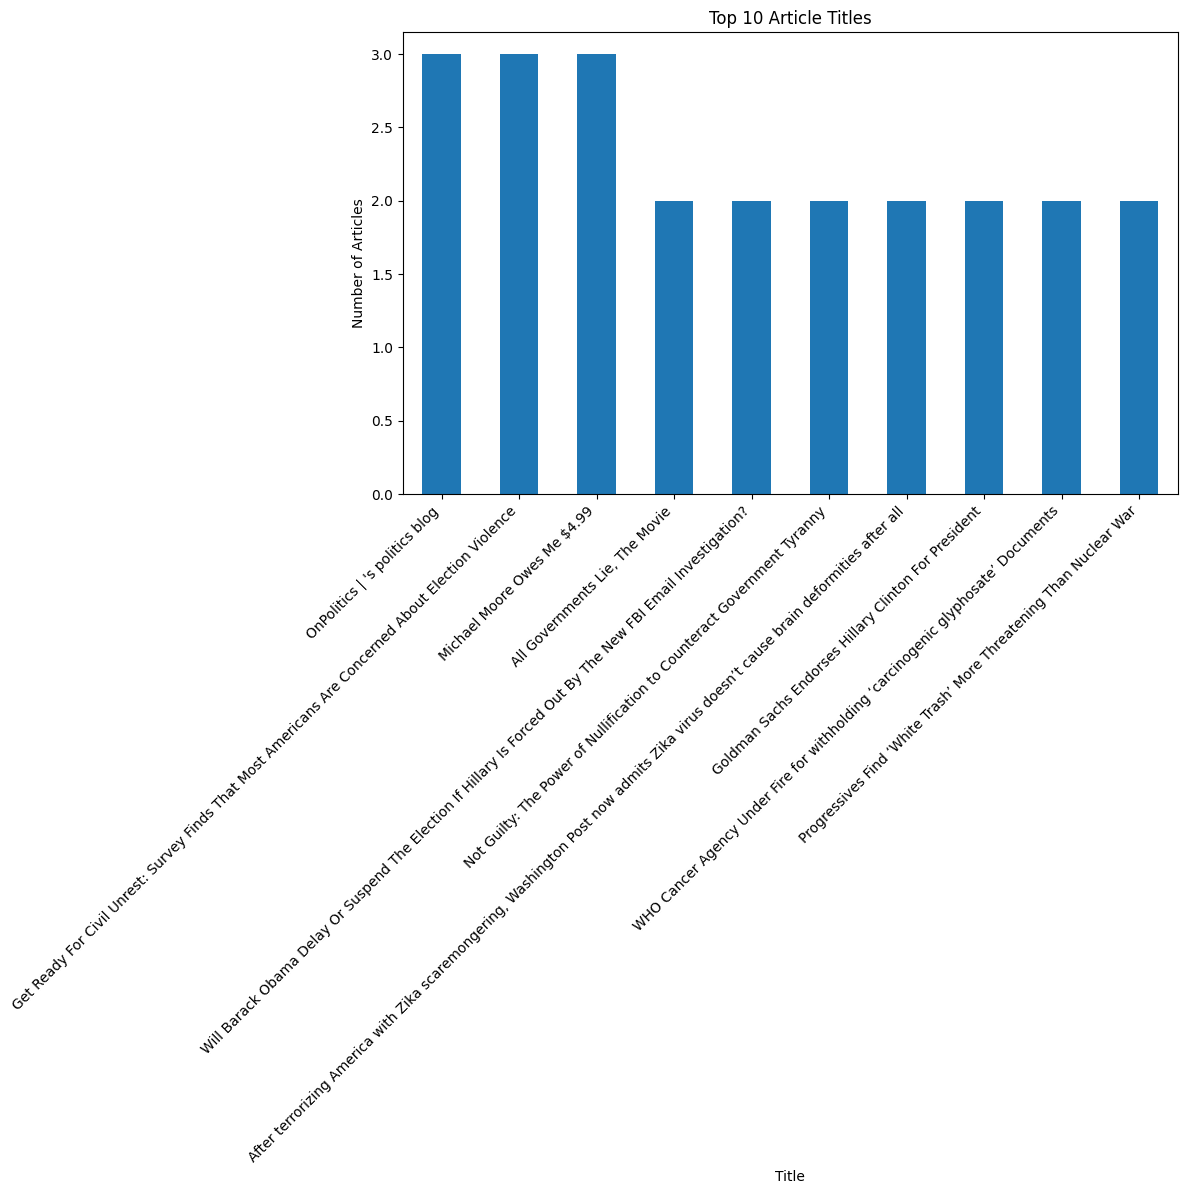

In [30]:
# Count the occurrences of each title
title_counts = News['title'].value_counts()

# Plot the bar plot
plt.figure(figsize=(10, 6))
title_counts[:10].plot(kind='bar')
plt.xlabel('Title')
plt.ylabel('Number of Articles')
plt.title('Top 10 Article Titles')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

# Data Preprocessing 

In [31]:
import nltk
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
from nltk.stem import PorterStemmer
import re

**Preprocessing of Text column :-**

In [32]:
# Function to preprocess text
def preprocess_text(text):
    # Lowercase the text
    text = text.lower()
    
    # Remove HTML tags
    text = re.sub('<.*?>', '', text)

    # Remove <br> tags
    text = text.replace('<br>', '')
    
    # Remove URLs
    text = re.sub(r'http\S+', '', text)

    # Tokenization
    tokens = word_tokenize(text)

    # Remove stopwords
    stop_words = set(stopwords.words('english'))
    tokens = [token for token in tokens if token not in stop_words]

    # Remove special characters and punctuation
    tokens = [token for token in tokens if token.isalnum()]

    # Stemming
    stemmer = PorterStemmer()
    tokens = [stemmer.stem(token) for token in tokens]

    # Reconstruct the preprocessed text
    preprocessed_text = ' '.join(tokens)

    return preprocessed_text

# Preprocess the 'text' column in your dataset
News['preprocessed_text'] = News['text'].apply(preprocess_text)

**Preprocessing of title column :-**

In [33]:
# Function to preprocess title
def preprocess_title(title):
    # Lowercase the title
    title = title.lower()

    # Remove HTML tags
    title = re.sub('<.*?>', '', title)

    # Remove <br> tags
    title = title.replace('<br>', '')

    # Remove URLs
    title = re.sub(r'http\S+', '', title)

    # Tokenization
    tokens = word_tokenize(title)

    # Remove stopwords
    stop_words = set(stopwords.words('english'))
    tokens = [token for token in tokens if token not in stop_words]

    # Remove special characters and punctuation
    tokens = [token for token in tokens if token.isalnum()]

    # Stemming
    stemmer = PorterStemmer()
    tokens = [stemmer.stem(token) for token in tokens]

    # Reconstruct the preprocessed title
    preprocessed_title = ' '.join(tokens)

    return preprocessed_title

# Preprocess the 'title' column in your dataset
News['preprocessed_title'] = News['title'].apply(preprocess_title)


In [34]:
News.head()

,title,text,label,label_numeric,detected_language,preprocessed_text,preprocessed_title
0,You Can Smell Hillary’s Fear,"Daniel Greenfield, a Shillman Journalism Fello...",FAKE,1,en,daniel greenfield shillman journal fellow free...,smell hillari fear
1,Watch The Exact Moment Paul Ryan Committed Pol...,Google Pinterest Digg Linkedin Reddit Stumbleu...,FAKE,1,en,googl pinterest digg linkedin reddit stumbleup...,watch exact moment paul ryan commit polit suic...
2,Kerry to go to Paris in gesture of sympathy,U.S. Secretary of State John F. Kerry said Mon...,REAL,0,en,secretari state john kerri said monday stop pa...,kerri go pari gestur sympathi
3,Bernie supporters on Twitter erupt in anger ag...,"— Kaydee King (@KaydeeKing) November 9, 2016 T...",FAKE,1,en,kayde king kaydeek novemb 9 2016 lesson tonigh...,berni support twitter erupt anger dnc tri warn
4,The Battle of New York: Why This Primary Matters,It's primary day in New York and front-runners...,REAL,0,en,primari day new york hillari clinton donald tr...,battl new york primari matter


**SINCE, WE DO NOT NEED THE TITLE AND TEXT COLUMN AS WE HAVE PREPROCESSED COLUMNS: -**

In [35]:
# Drop the 'title' and 'text' columns from the dataset
News = News.drop(columns=['title', 'text'])


In [36]:
News.head()

,label,label_numeric,detected_language,preprocessed_text,preprocessed_title
0,FAKE,1,en,daniel greenfield shillman journal fellow free...,smell hillari fear
1,FAKE,1,en,googl pinterest digg linkedin reddit stumbleup...,watch exact moment paul ryan commit polit suic...
2,REAL,0,en,secretari state john kerri said monday stop pa...,kerri go pari gestur sympathi
3,FAKE,1,en,kayde king kaydeek novemb 9 2016 lesson tonigh...,berni support twitter erupt anger dnc tri warn
4,REAL,0,en,primari day new york hillari clinton donald tr...,battl new york primari matter


# Visualization after Data Pre Processing :-

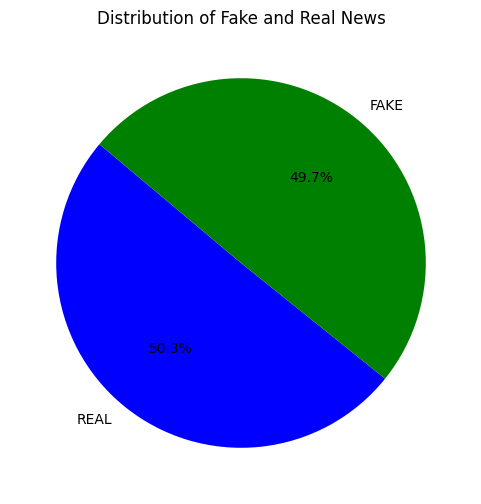

In [37]:
# Count the occurrences of each label
label_counts = News['label'].value_counts()

# Plot the pie chart
plt.figure(figsize=(6, 6))
plt.pie(label_counts, labels=label_counts.index, autopct='%1.1f%%', colors=['blue', 'green'], startangle=140)
plt.title('Distribution of Fake and Real News')
plt.show()

# Marking Target and Predictor Variable :-

In [38]:
X = News[['preprocessed_text', 'preprocessed_title']]         #predictor variable
y = News['label_numeric']                                   #target variable

In [39]:
X.head()

,preprocessed_text,preprocessed_title
0,daniel greenfield shillman journal fellow free...,smell hillari fear
1,googl pinterest digg linkedin reddit stumbleup...,watch exact moment paul ryan commit polit suic...
2,secretari state john kerri said monday stop pa...,kerri go pari gestur sympathi
3,kayde king kaydeek novemb 9 2016 lesson tonigh...,berni support twitter erupt anger dnc tri warn
4,primari day new york hillari clinton donald tr...,battl new york primari matter


In [40]:
y.head()

0    1
1    1
2    0
3    1
4    0
Name: label_numeric, dtype: int64

# Splitting the dataset for training and testing:-

In [41]:
from sklearn.model_selection import train_test_split

# Split the data into 80% training and 20% testing
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42) 

In [42]:
X_train.shape

(5012, 2)

In [43]:
X_test.shape

(1253, 2)

# Embedding Vectorization :-

In [44]:
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences
from tensorflow.keras.models import Sequential
import tensorflow as tf

In [45]:
# Create and fit a tokenizer on the combined text and title data
tokenizer = Tokenizer()
tokenizer.fit_on_texts(X_train['preprocessed_text'] + X_train['preprocessed_title'])

# Tokenize text and title data
X_train_sequences_text = tokenizer.texts_to_sequences(X_train['preprocessed_text'])
X_train_sequences_title = tokenizer.texts_to_sequences(X_train['preprocessed_title'])
X_test_sequences_text = tokenizer.texts_to_sequences(X_test['preprocessed_text'])
X_test_sequences_title = tokenizer.texts_to_sequences(X_test['preprocessed_title'])

# Pad sequences to a fixed length
max_sequence_length = 100  # Set your desired sequence length
X_train_padded_text = pad_sequences(X_train_sequences_text, maxlen=max_sequence_length)
X_train_padded_title = pad_sequences(X_train_sequences_title, maxlen=max_sequence_length)
X_test_padded_text = pad_sequences(X_test_sequences_text, maxlen=max_sequence_length)
X_test_padded_title = pad_sequences(X_test_sequences_title, maxlen=max_sequence_length)

In [46]:
# Set random seeds for reproducibility
seed_value = 42
tf.random.set_seed(seed_value)
np.random.seed(seed_value)

# RNN Model :-

In [47]:
from tensorflow.keras.layers import Embedding, SimpleRNN, Dense, Dropout, concatenate
from tensorflow.keras.models import Model

# Build a simple RNN model
model = Sequential()

# Add an embedding layer
embedding_layer = Embedding(input_dim=len(tokenizer.word_index) + 1, output_dim=100, input_length=max_sequence_length)
model.add(embedding_layer)

# Add an RNN layer
model.add(SimpleRNN(100, dropout=0.2, recurrent_dropout=0.2))

# Add a dense layer
model.add(Dense(64, activation='relu'))

# Add a dropout layer
model.add(Dropout(0.5))

# Add the output layer
model.add(Dense(1, activation='sigmoid'))

# Compile the model
model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])

# Print the model summary
model.summary()

# Train the model
model.fit(X_train_padded_text, y_train, batch_size=64, epochs=5, validation_split=0.1)

# Evaluate the model
loss, accuracy = model.evaluate(X_test_padded_text, y_test)
print("Test Accuracy:", accuracy)


Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding (Embedding)       (None, 100, 100)          4372200   
                                                                 
 simple_rnn (SimpleRNN)      (None, 100)               20100     
                                                                 
 dense (Dense)               (None, 64)                6464      
                                                                 
 dropout (Dropout)           (None, 64)                0         
                                                                 
 dense_1 (Dense)             (None, 1)                 65        
                                                                 
Total params: 4398829 (16.78 MB)
Trainable params: 4398829 (16.78 MB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________
Epoch 1/5


C:\Users\Tanay's PC\AppData\Local\Programs\Python\Python310\lib\site-packages\keras\src\engine\data_adapter.py:1798: FutureWarning: The behavior of `series[i:j]` with an integer-dtype index is deprecated. In a future version, this will be treated as *label-based* indexing, consistent with e.g. `series[i]` lookups. To retain the old behavior, use `series.iloc[i:j]`. To get the future behavior, use `series.loc[i:j]`.
  return t[start:end]


71/71 [==============================] - 7s 78ms/step - loss: 0.7097 - accuracy: 0.5262 - val_loss: 0.6818 - val_accuracy: 0.5219
Epoch 2/5
71/71 [==============================] - 5s 73ms/step - loss: 0.6919 - accuracy: 0.5559 - val_loss: 0.6665 - val_accuracy: 0.5777
Epoch 3/5
71/71 [==============================] - 5s 69ms/step - loss: 0.6675 - accuracy: 0.5860 - val_loss: 0.6448 - val_accuracy: 0.6175
Epoch 4/5
71/71 [==============================] - 5s 73ms/step - loss: 0.6257 - accuracy: 0.6306 - val_loss: 0.6302 - val_accuracy: 0.6474
Epoch 5/5
40/40 [==============================] - 0s 5ms/step - loss: 0.5477 - accuracy: 0.6935
Test Accuracy: 0.6935355067253113


# LSTM model :- 

In [48]:
from tensorflow.keras.layers import Embedding, LSTM, Dense, Dropout, concatenate
from tensorflow.keras.models import Sequential

# Build an LSTM model
model = Sequential()

# Add an embedding layer
embedding_layer = Embedding(input_dim=len(tokenizer.word_index) + 1, output_dim=100, input_length=max_sequence_length)
model.add(embedding_layer)

# Add an LSTM layer
model.add(LSTM(100, dropout=0.2, recurrent_dropout=0.2))

# Add a dense layer
model.add(Dense(64, activation='relu'))

# Add a dropout layer
model.add(Dropout(0.5))

# Add the output layer
model.add(Dense(1, activation='sigmoid'))

# Compile the model
model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])

# Print the model summary
model.summary()

# Train the model
model.fit(X_train_padded_text, y_train, batch_size=64, epochs=5, validation_split=0.1)

# Evaluate the model
loss, accuracy = model.evaluate(X_test_padded_text, y_test)
print("Test Accuracy:", accuracy)


Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding_1 (Embedding)     (None, 100, 100)          4372200   
                                                                 
 lstm (LSTM)                 (None, 100)               80400     
                                                                 
 dense_2 (Dense)             (None, 64)                6464      
                                                                 
 dropout_1 (Dropout)         (None, 64)                0         
                                                                 
 dense_3 (Dense)             (None, 1)                 65        
                                                                 
Total params: 4459129 (17.01 MB)
Trainable params: 4459129 (17.01 MB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________
Epoch 1/5
71/7

In [49]:
from joblib import dump, load #use it to save Python objects (such as trained machine learning models) to files for later use. 

In [50]:
dump(model, './../savedmodels/model.joblib')

['./../savedmodels/model.joblib']

In [51]:
# Save the tokenizer
dump(tokenizer, './../savedmodels/tokenizer.joblib')

# Load the tokenizer
tokenizer = load('./../savedmodels/tokenizer.joblib')

In [52]:
print(News['preprocessed_text'].iloc[0])

daniel greenfield shillman journal fellow freedom center new york writer focus radic islam final stretch elect hillari rodham clinton gone war fbi word unpreced thrown around often elect ought retir still unpreced nomine major polit parti go war fbi exactli hillari peopl done coma patient wake watch hour cnn hospit bed would assum fbi director jame comey hillari oppon elect fbi attack everyon obama cnn hillari peopl circul letter attack comey current media hit piec lambast target trump surpris clinton alli start run attack ad fbi fbi leadership warn entir establish form lynch mob continu go hillari fbi credibl attack media democrat preemptiv head result investig clinton foundat hillari clinton covert struggl fbi agent obama doj peopl gone explos public new york time compar comey edgar hoover bizarr headlin jame comey role recal hoover fbi fairli practic admit front spout nonsens boston globe publish column call comey resign outdon time editori claim scandal realli attack women jame car